# Diabetes: EDA, hypothesis testing, predictions with Python
This project focuses on analyzing diabetes medical data and developing predictive models for diabetes status. The workflow includes exploratory data analysis (EDA), hypothesis testing, and feature engineering, followed by the implementation and evaluation of multiple classification models. To address class imbalance and improve model performance, various resampling techniques and class weighting strategies are applied. 

## About Dataset
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. 

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

# Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Check info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Might be useful later to divide dataset into two - diabetes and no_diabetes
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]

Seems like our data is cleaned, no null values, meaningful column names, correct data types, and data is ready for further analysis. 

# Gender

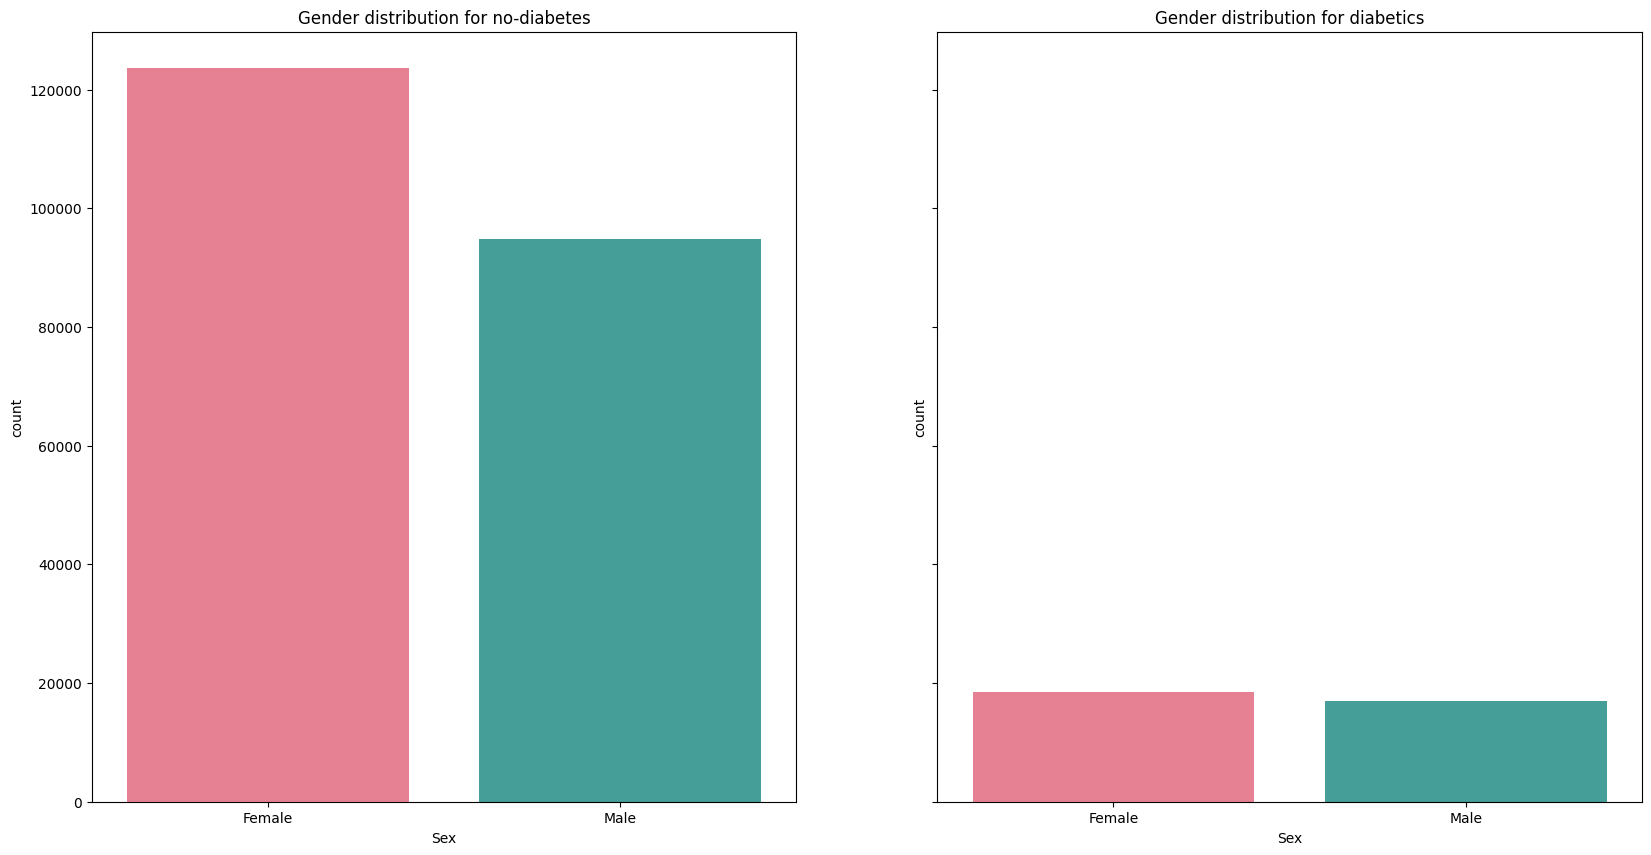

In [5]:
# Lets discover gender distribution 
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))
ax1 = sns.countplot(data=df_no, x='Sex', ax=ax1, palette='husl')
ax1.set(title='Gender distribution for no-diabetes')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data=df_yes, x='Sex', ax=ax2, palette='husl')
ax2.set(title='Gender distribution for diabetics')
ax2.set_xticklabels(['Female', 'Male'])
plt.show()

# Age

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

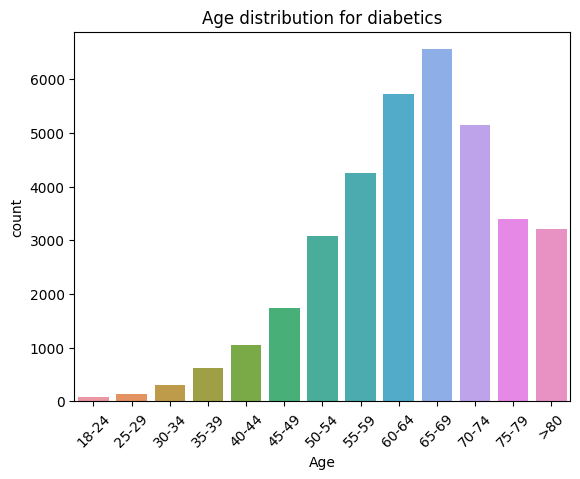

In [6]:
# Check age distribution for people with diabetes
ax = sns.countplot(data=df_yes, x='Age')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)

# BMI

(15.0, 60.0)

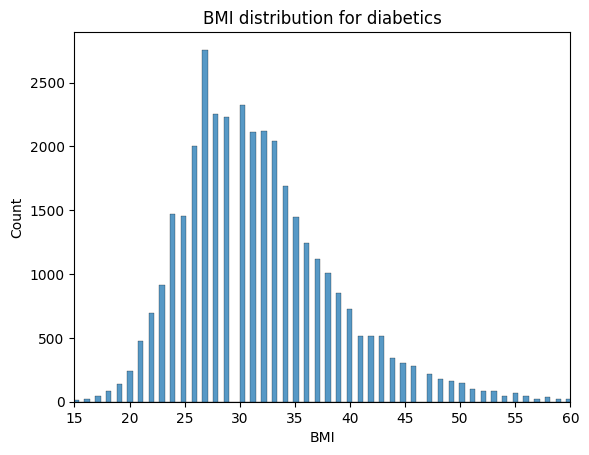

In [7]:
# Check BMI for people with diabetes. 
# We will remove outliers for better visualization, less than 15 and greater than 60.
sns.histplot(data=df_yes, x='BMI').set(title='BMI distribution for diabetics')
plt.xlim(15, 60)

(15.0, 60.0)

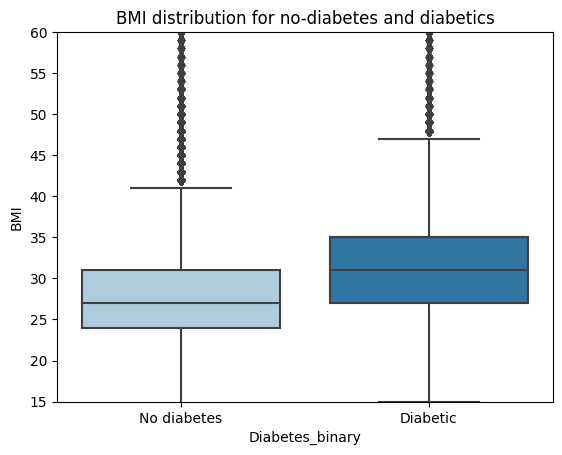

In [8]:
# Compare BMI for people with and without diabetes
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for no-diabetes and diabetics')
ax.set_xticklabels(['No diabetes', 'Diabetic'])
plt.ylim(15, 60)

# High Cholesterol, High Blood Pressure, Smoking, Alcohol Consumption, Physical Activity

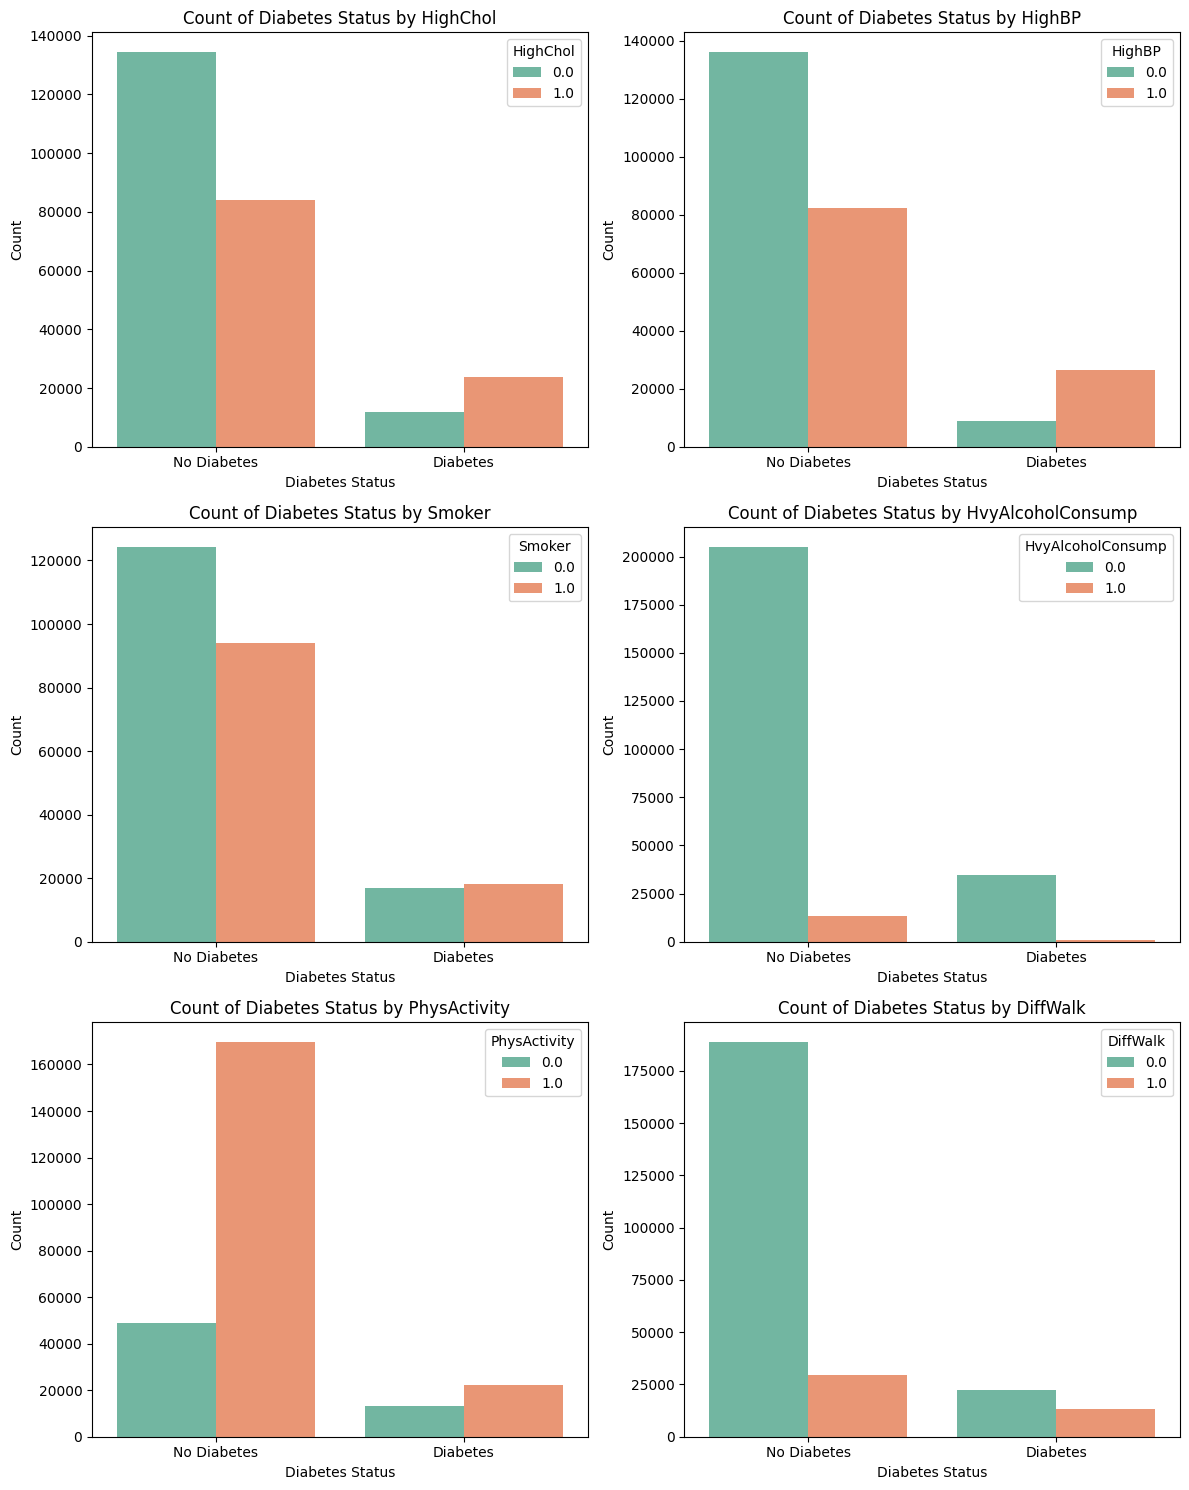

In [9]:
# There are some binary columns that we can visualy compare data between no-diabetes and diabetics.
# Lets iterate from those columns and build plots in one go.
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3  # number of rows
b = 2  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(12, 15))
for col in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data=df, x='Diabetes_binary', hue=col, palette='Set2')
    ax.set(title=f'Count of Diabetes Status by {col}', xlabel='Diabetes Status', ylabel='Count')
    ax.set_xticklabels(['No Diabetes', 'Diabetes'])
    ax.legend(title=col)
    c += 1  
plt.tight_layout()
plt.show()

# Correlation matrix

In [10]:
# Create a correlation matrix
corr_matrix = df.corr()
# Do some conditional formatting for better readability
cm = sns.light_palette("seagreen", as_cmap=True)
corr_matrix_style = corr_matrix.style.background_gradient(cmap = cm)
corr_matrix_style

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


<Axes: >

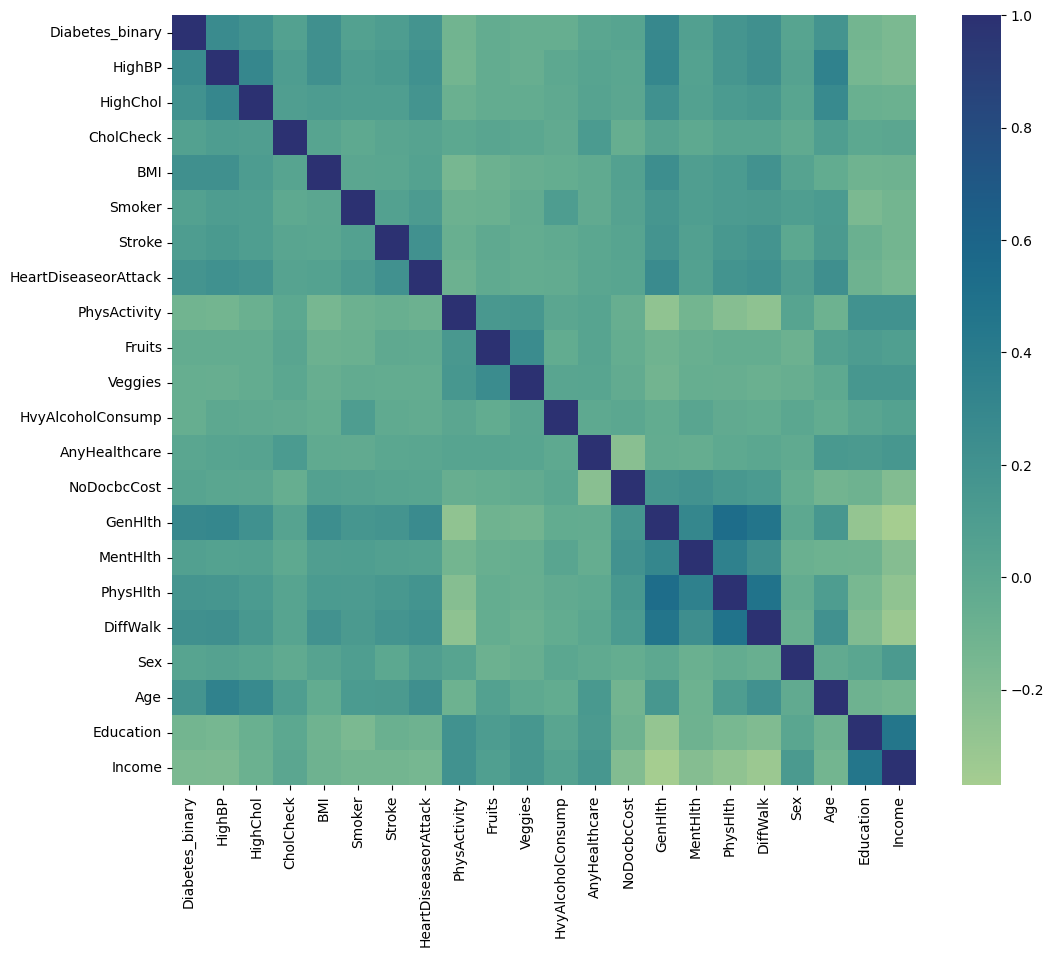

In [11]:
# Visualize relationship between all variables
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix, cmap='crest')

# Observations
* Both females and males are vulnerable to diabetes. 
* Age groups that are most affected by diabetes 60-64, 65-70, 70-74. 
* People with diabetes have higher BMI.
* People with diabetes tend to have high cholesterol levels and high blood pressure.
* Diabetics have fewer physical activities and difficulty walking.
* Smoking and alcohol consumption doesn't affect diabetes status much. 
* Variables correlated with diabetes status are general health, high blood pressure, high cholesterol, BMI, difficulties in walking, and age. 

# Hypothesis testing
Let's set up some hypotheses and test them to determine if our observations are likely to have really occurred based on statistics.

# 1. Do no-diabetes and diabetics have the same BMI?

* H0 - no-diabetes and diabetics have the same average BMI.
* Ha - no-diabetes and diabetics have different average BMI.

In [12]:
# Lets prepare dataset
df_no_bmi = df_no['BMI']
df_yes_bmi = df_yes['BMI']


In [13]:
# Check the average BMI
print('Average BMI for diabetics is {} and no-diabetes is {} '.format(df_yes_bmi.mean(),df_no_bmi.mean()))

Average BMI for diabetics is 31.94401063769592 and no-diabetes is 27.80577005871738 


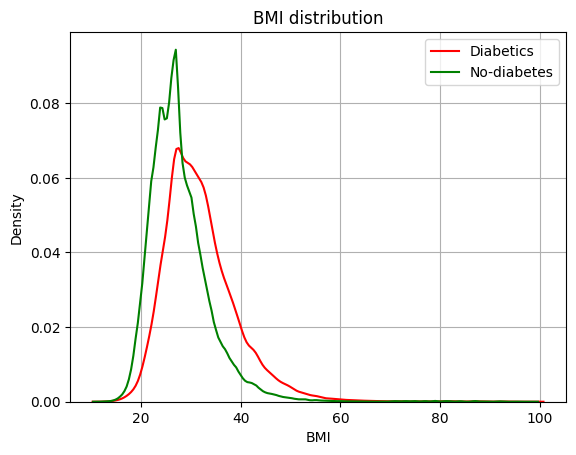

In [14]:
# Check visually how BMI distribution looks like
sns.kdeplot(df_yes_bmi,color='red')
sns.kdeplot(df_no_bmi,color='green')
plt.grid()
plt.title('BMI distribution')
plt.legend(['Diabetics', 'No-diabetes'])

In [15]:
# Now use the ttest since we compare the means of two independent groups
ttest,p_value_1  = stats.ttest_ind(df_yes_bmi, df_no_bmi)
if p_value_1 < 0.05:   
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


So, we reject null hypothesis that no-diabetes and diabetics have the same average BMI.

# 2. Do no-diabetes and diabetics have the same number of poor physical health days per month?
* H0 - No-diabetes and diabetics have the same average number of poor physical health days per month.
* Ha - No-diabetes and diabetics have the different average number of poor physical health days per month

In [16]:
# Prepare datasets
df_no_ph = df_no['PhysHlth']
df_yes_ph = df_yes['PhysHlth']

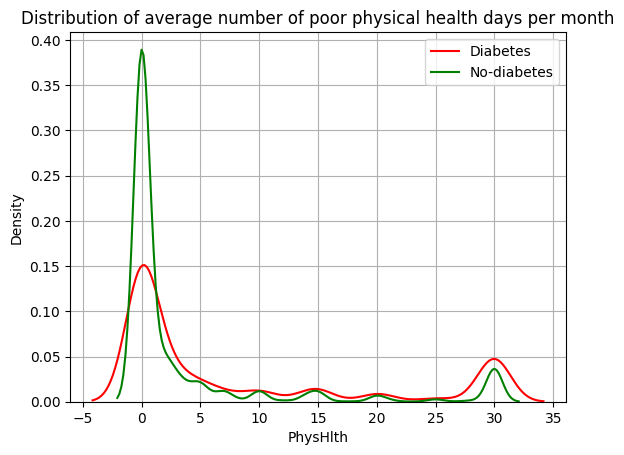

In [17]:
# Check the distribution of average number of poor physical health days per month
sns.kdeplot(df_yes_ph,color='red')
sns.kdeplot(df_no_ph,color='green')
plt.grid()
plt.title('Distribution of average number of poor physical health days per month')
plt.legend(['Diabetes', 'No-diabetes'])

In [18]:
# Count average days
print('Average days of poor physical health for diabetics is {} and no-diabetics is {} '.format(df_yes_ph.mean(),df_no_ph.mean()))

Average days of poor physical health for diabetics is 7.954478583149437 and no-diabetics is 3.6410820119633223 


In [19]:
# Use t-test to compare the means of two independent groups
ttest,p_value_2  = stats.ttest_ind(df_yes_ph, df_no_ph)
if p_value_2 < 0.05:   
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


We reject the null hypothesis that no-diabetes and diabetics have the same average number of poor physical health days per month.

# 3. Is the proportion of high cholesterol significantly different across diabetics and no-diabetes?
* H0 - High cholesterol proportion is not significantly different across diabetics and no-diabetes.
* Ha - High cholesterol proportion is different across diabetics and no-diabetes.

In [20]:
# Prepare data
contingency= pd.crosstab(df.Diabetes_binary, df.HighChol)
contingency

HighChol,0.0,1.0
Diabetes_binary,,
0.0,134429,83905
1.0,11660,23686


Text(0.5, 1.0, 'High cholesterol proportion across diabetics and no-diabetes')

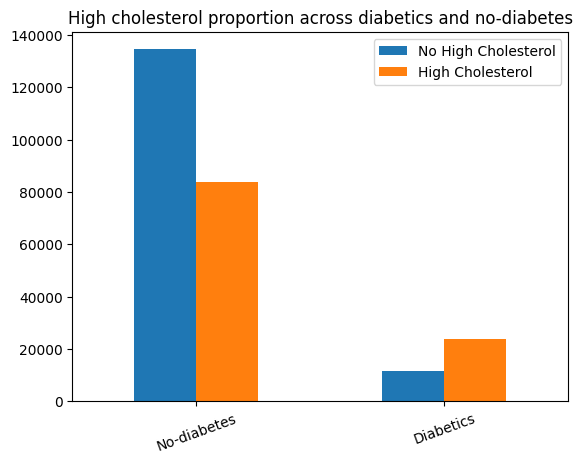

In [21]:
# Visualize high cholesterol proportions
ax = contingency.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend(['No High Cholesterol', 'High Cholesterol'])
plt.title('High cholesterol proportion across diabetics and no-diabetes')

In [22]:
# Since we are trying to determine whether there is a significant association 
# between two categorical variables,we will use chi2 test
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')


Reject Null Hypothesis


We reject the null hypothesis that high cholesterol proportion is not significantly different across diabetics and no-diabetes.

# 4. Is the proportion of high blood pressure significantly different across diabetics and no-diabetes?
* H0 - High blood pressure proportion is not significantly different across diabetics and no-diabetes.
* Ha - High blood pressure proportion is different across diabetics and no-diabetes.

In [23]:
# Prepare data
contingency2= pd.crosstab(df.Diabetes_binary, df.HighBP)
contingency2

HighBP,0.0,1.0
Diabetes_binary,,
0.0,136109,82225
1.0,8742,26604


Text(0.5, 1.0, 'High blood pressure proportion across diabetics and no-diabetes')

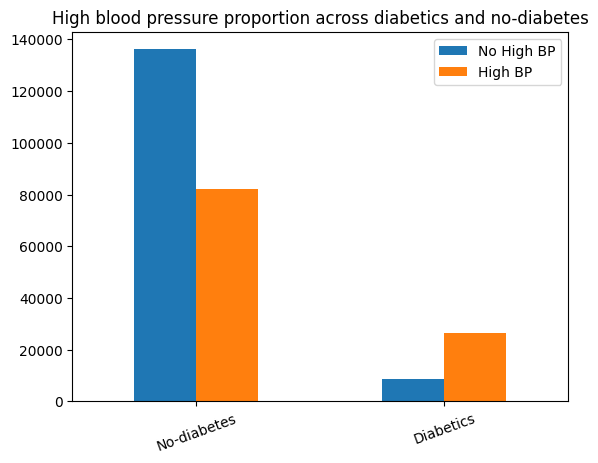

In [24]:
# Visualize proportion of high blood pressure for people with and without diabetes
ax = contingency2.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend( ['No High BP', 'High BP'])
plt.title('High blood pressure proportion across diabetics and no-diabetes')

In [25]:
# Chi2 test for testing relationships between two categorical variables
chi2, p_value_4, dof, exp_freq = chi2_contingency(contingency2)
if (p_value_4 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


We reject the null hypothesis that high blood pressure proportion is not significantly different across diabetics and no-diabetes.

# Predictions
In this section, we build and evaluate multiple machine learning models to predict diabetes status based on health and demographic variables. The modeling process includes experimenting with a range of classification models and applying class weighting and various resampling techniques to address class imbalance. 

In [26]:
!pip install --quiet --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

# Feature engineering
In this step, we engineer new features to see if they can improve model performance. We create BMI categories using CDC thresholds, add an interaction between BMI and age, and define a high-risk group combining obesity with older age. These new features may help capture additional patterns that the original variables might miss.


In [28]:
# BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_cat'] = df['BMI'].apply(bmi_category)

# BMI x Age (Age is coded 1-13, higher = older age group)
df['BMI_Age_interaction'] = df['BMI'] * df['Age']

# High_risk group: Obese + Age 10+ (65+ per BRFSS age codes)
df['HighRisk_Obese_Old'] = ((df['BMI_cat'] == 'Obese') & (df['Age'] >= 10)).astype(int)

# Convert BMI_cat to ordinal codes 
df['BMI_cat_code'] = pd.Categorical(df['BMI_cat'], 
                                    categories=['Underweight','Normal','Overweight','Obese'],
                                    ordered=True).codes
df = df.drop(columns=['BMI_cat'])

# Train-test split
We perform the train-test split before any preprocessing, feature selection, or resampling to prevent **data leakage**.
Data leakage occurs when information from the test set unintentionally influences the model during training, leading to overly optimistic performance metrics and poor generalization to real-world data.

In [29]:
# Define features and target
X = df.drop('Diabetes_binary', axis=1) 
y = df['Diabetes_binary']

# Splitting the data into training and testing sets, while preserving class distribution using stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Preprocessing and feature selection 
We prepare the data by scaling numerical features, encoding categorical ones, and selecting the most relevant features using ANOVA F-test. Binary features are passed through without transformation, since their 0/1 format is already optimal for modeling. 


In [30]:
# Specify the feature types for preprocessing
numeric_features = ['BMI', 'BMI_Age_interaction', 'MentHlth', 'PhysHlth']
categorical_features = ['Age','Education', 'Income', 'GenHlth', 'BMI_cat_code']


# Build a preprocessing pipeline using ColumnTransformer to handle numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OrdinalEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# Feature selection using ANOVA F-test (f_classif) to select the top 16 features
feature_selector = SelectKBest(score_func=f_classif, k=16)

# Training and evaluation  
We use a pipeline approach for model development, where each pipeline includes preprocessing, optional resampling, feature selection, and classification. Multiple model types and imbalance handling strategies are evaluated. Models are evaluated using accuracy, precision, recall, F1 score, and AUC.  

# Class weights to address class imbalance
Many real-world datasets, including this one, have imbalanced target classes. To address this, we first train models with class weights. This method increases the penalty for misclassifying the minority class, helping the model pay more attention to cases of diabetes during training.

In [31]:
# Define models with class_weight
weighted_models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=12, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced'),
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=250, verbose=-1)
}

In [32]:
# List to store results
results = []

for model_name, base_model in weighted_models.items():
        steps = [
            ('preprocessor', preprocessor),
            ('feature_selection', feature_selector),
            ('classifier', base_model)
        ]

        # Build pipeline
        clf = ImbPipeline(steps=steps)

        # Fit
        clf.fit(X_train, y_train)

        # Predict
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, -1] if hasattr(clf.named_steps['classifier'], "predict_proba") else None

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        # Store results
        results.append({
            "Model": model_name,
            "Accuracy": round(accuracy, 3),
            "Precision": round(precision, 3),
            "Recall": round(recall, 3),
            "F1 Score": round(f1, 3),
            "AUC Score": round(auc, 3),
        })
    
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.732,0.860,0.732,0.771,0.817
1,Decision Tree,0.713,0.854,0.713,0.755,0.781
2,Random Forest,0.745,0.858,0.745,0.781,0.818
3,LightGBM,0.721,0.861,0.721,0.762,0.820


# Sampling techniques to handle class imbalance
To address class imbalance, we define multiple resampling strategies, including oversampling and undersampling techniques. These approaches adjust the training data to provide a more balanced representation of both classes, helping the models learn to identify minority class cases more effectively.


In [33]:
# Define sampling techniques
sampling_methods = {
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "EditedNN": EditedNearestNeighbours(n_neighbors=3),
    "TomekLinks": TomekLinks(),
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=12),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42),
    "LGBM": LGBMClassifier(random_state=42, n_estimators=250, verbose=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators = 250),
    "XGB": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
} 

In [34]:
# List to store results
results2 = []

# Iterate through all combinations of sampling techniques and classification models
for method_name, sampler in sampling_methods.items():
    for model_name, base_model in models.items():
        steps = [
            ('preprocessor', preprocessor),
            ('sampler', sampler),
            ('feature_selection', feature_selector),
            ('classifier', base_model)
        ]

        # Build pipeline
        clf = ImbPipeline(steps=steps)

        # Fit
        clf.fit(X_train, y_train)

        # Predict
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, -1] if hasattr(clf.named_steps['classifier'], "predict_proba") else None

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        # Store results
        results2.append({
            "Sampling Method": method_name,
            "Model": model_name,
            "Accuracy": round(accuracy, 3),
            "Precision": round(precision, 3),
            "Recall": round(recall, 3),
            "F1 Score": round(f1, 3),
            "AUC Score": round(auc, 3),
        })
  

In [38]:
# Convert results to DataFrame
results_df2 = pd.DataFrame(results2)
results_df2.style\
    .apply(lambda row: ['background-color: seagreen']*len(row) if row['Accuracy'] == results_df2['Accuracy'].max() else ['']*len(row), axis=1)\
    .format(precision=3)

,Sampling Method,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,RandomOverSampler,Logistic Regression,0.733,0.860,0.733,0.771,0.819
1,RandomOverSampler,Decision Tree,0.724,0.855,0.724,0.764,0.785
2,RandomOverSampler,Random Forest,0.735,0.860,0.735,0.773,0.820
3,RandomOverSampler,LGBM,0.723,0.861,0.723,0.763,0.821
4,RandomOverSampler,Gradient Boosting,0.716,0.863,0.716,0.758,0.823
5,RandomOverSampler,XGB,0.725,0.860,0.725,0.765,0.817
6,SMOTE,Logistic Regression,0.734,0.860,0.734,0.772,0.818
7,SMOTE,Decision Tree,0.807,0.843,0.807,0.821,0.804
8,SMOTE,Random Forest,0.810,0.846,0.810,0.824,0.817
9,SMOTE,LGBM,0.863,0.832,0.863,0.836,0.821


In this analysis, we evaluated a variety of classification models using both class weighting and resampling strategies to address class imbalance. 

The best overall performance was achieved by ensemble methods, particularly LightGBM, Gradient Boosting, and Random Forest, combined with SMOTE or TomekLinks resampling. These models reached accuracy up to **0.863** and AUC values up to **0.823**. 

Each model offered a different balance between correctly identifying positive cases and minimizing false alarms. This highlights the importance of comparing multiple techniques to understand the strengths and limitations of both the data and the models. 

### Thank you for reading!